_Exercise assignment for the course [Unsupervised and Reinforcement Learning (AAI-URL)](https://inf-git.fh-rosenheim.de/aai-url/hsro-aai-url-github-io) in the [Bachelor of AAI](https://www.th-rosenheim.de/en/technology/computer-science-mathematics/applied-artificial-intelligence-bachelors-degree) at [Rosenheim University of Applied Sciences](http://www.th-rosenheim.de)_

# Assigment 05 - Principal Component Analysis

> As usual: The solution is available in branch "musterloesung"!

## Task 1: Principal Component Analysis

PCA is a linear transformation that finds the “principal components”, or directions of greatest variance, in a data set. It can be used for dimension reduction among other things. 

In this task, we’re applying PCA to a simple 2-dimensional data set to see how it works. 


a) Let’s start by loading and visualizing the data set.

```python
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.io import loadmat

data = loadmat('data.mat') 
X = data['X']

# todo visualize as scatter plot
```

>Note: `mat`is a MatLba file format and the scipy package can read that file!

b) Normalize and center the data and then find eigenvalues and eigenvectors.


c) Project data to PCA1 and plot.

d) Compare the result with 'sklearn.decomposition.PCA'

## Task 3: Some LinA fun :-)

In this task, we visualize how a linear operation encoded by a 2D matrix transforms a vector space. 

We use vector space to visualize the stretching and rotation of data points.

As an example, consider the matrix following matrix:

```math
A=\left( \begin{array}{rr}
2 & -1 \\ 
1 & 1 \\
\end{array}\right)
```
We can get a visual feel for this transformation by looking at a regular grid of points before and after the transformation

![image.png](./image.png)

![image-1.png](./image-1.png)


To enable this, follow the strategy:

- Create a rectangular array of points in x-y space.

- Map grid coordinates to colors that uniquely identify each point by using this funtion
```python
def colorizer(x, y):
    """
    Map x-y coordinates to a rgb color
    """
    r = min(1, 1-y/3)
    g = min(1, 1+y/3)
    b = 1/4 + x/16
    return (r, g, b)
```

- Generate a series of intermediate transforms that will “smoothly” transition from the original grid to the transformed grid. Please feel inspired by this function:
```python
def stepwise_transform(a, points, nsteps=24):
    '''
    Generate a series of intermediate transform for the matrix multiplication
      np.dot(a, points) # matrix multiplication
    starting with the identity matrix, where
      a: 2-by-2 matrix
      points: 2-by-n array of coordinates in x-y space 
    returns a (nsteps + 1)x2xn array
    '''
    # create empty array of the right size
    transgrid = np.zeros((nsteps+1,) + np.shape(points))
    for j in range(nsteps+1):
        intermediate = np.eye(2) + j/nsteps*(a - np.eye(2)) # compute intermediate matrix
        transgrid[j] = np.dot(intermediate, points) # apply intermediate matrix transformation
    return transgrid

```

- Apply it to a rotation matrix, shear matrix, permutation matrix and projection

  - rotation: 
  ```python  
  theta = np.pi/3 # 60 degree clockwise rotation
  a = np.column_stack([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
  ```

  - shear:
  ```python
  a = np.column_stack([[1, 0], [2, 1]])
  ```

  - permutation:
  ```python
  a = np.column_stack([[0, 1], [1, 0]])
  ```
  
  - projection:
  ```python
  a = np.column_stack([[1, 0], [0, 0]])
  ```

- (optional) Plot each of the intermediate transforms and save them as individual images.
- (optional) Stitch images into a gif

![stepwise-transform.gif](./stepwise-transform.gif)




## Task 1: Principal Component Analysis

PCA is a linear transformation that finds the “principal components”, or directions of greatest variance, in a data set. It can be used for dimension reduction among other things. 

In this task, we’re applying PCA to a simple 2-dimensional data set to see how it works. 


a) Let’s start by loading and visualizing the data set.

```python
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.io import loadmat

data = loadmat('data.mat') 
X = data['X']

# todo visualize as scatter plot
```

>Note: `mat`is a MatLba file format and the scipy package can read that file!

b) Normalize and center the data and then find eigenvalues and eigenvectors.


c) Project data to PCA1 and plot.

d) Compare the result with 'sklearn.decomposition.PCA'

<class 'dict'>
<class 'numpy.ndarray'>
(50, 2)


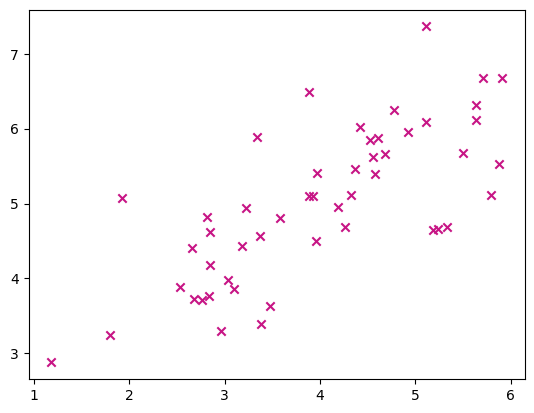

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = loadmat('data.mat')
print(type(data))
#print(data)
X = data['X']
#print(X)
print(type(X)) 
#since it is a numpy array, we can make a scatter plot already 
# todo visualize as scatter plot
print(X.shape)
plt.scatter(X[:,0], X[:,1], marker="x", c="mediumvioletred")
plt.show()


   Feature 1  Feature 2
0  -0.523313  -1.592793
1   0.463815   0.840345
2  -1.148393  -0.583159
3  -1.054054  -1.270718
4  -0.984022  -0.816584


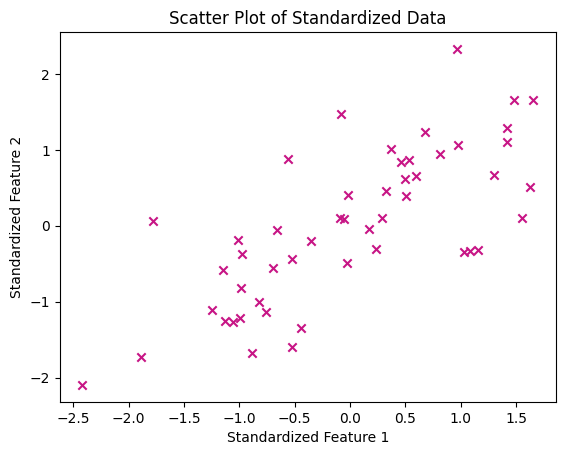

In [ ]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=["Feature 1", "Feature 2"])
print(X_scaled_df.head())
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], marker="x", c="mediumvioletred")
plt.title("Scatter Plot of Standardized Data")
plt.xlabel("Standardized Feature 1")
plt.ylabel("Standardized Feature 2")
plt.show()


In [ ]:
cov_matrix = np.cov(X_scaled_df.T)
print(cov_matrix)
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)

print("Eigenvalues")
print(eigen_vals)
print()
print("Eigenvectors as columns")
print(eigen_vecs)


[[1.02040816 0.7505412 ]
 [0.7505412  1.02040816]]
Eigenvalues
[1.77094936 0.26986696]

Eigenvectors as columns
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


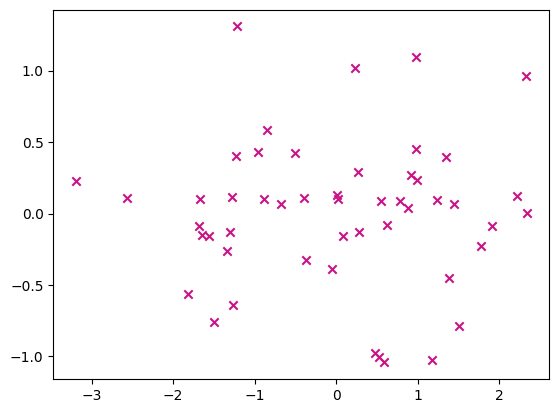

In [ ]:
manual_pca = np.dot(X_scaled_df, eigen_vecs)
pd.DataFrame(np.dot(X_scaled_df, eigen_vecs)[0:5, 0:2],columns=['PC1', 'PC2'])

plt.scatter(manual_pca[:, 0], manual_pca[:, 1], marker='x', c='mediumvioletred')


[1.77094936 0.26986696]


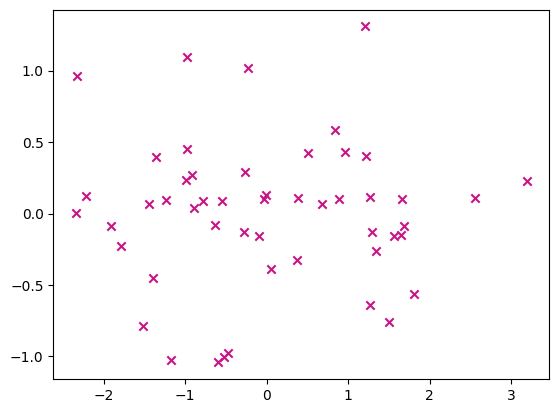

In [ ]:
pca = PCA(n_components=None)
pca.fit(X_scaled_df)
print(pca.explained_variance_)

pca = PCA(n_components=2)
data_pca = pd.DataFrame(pca.fit_transform(X_scaled_df), 
             columns=['PC1', 'PC2'])

data_pca.head()

plt.scatter(data_pca['PC1'], data_pca['PC2'], marker='x', c='mediumvioletred')
plt.show()

the results are mathematically equivalent. The signs of the principal components do not affect the variance explained or the geometric relationships in the data. It is purely a representation issue.